<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import lazypredict
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from yellowbrick.model_selection import FeatureImportances

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Processed Dataset from previous Notebook</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [47]:
plasma = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/plasma(Specific Metabolics)_final2.csv')
serum = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/serum(Specific Metabolics)_final2.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [48]:
plasma

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,-0.38,-1.31,0.52,-1.02,-0.85,0.51,-0.33,-0.19,0.42,0.76,...,-0.04,-0.34,-1.21,-0.10,-0.10,0.03,-0.27,1.38,0.41,disease
1,0.95,-0.46,-0.90,-1.24,-0.82,-0.39,0.69,1.04,1.37,0.09,...,0.15,-0.29,-0.13,-1.19,0.22,-0.83,-0.41,0.29,-0.16,disease
2,0.69,-0.49,0.83,-0.23,-0.35,0.35,-0.56,0.36,-0.31,0.06,...,1.06,0.24,0.68,-0.71,0.98,0.02,0.95,-0.19,0.83,disease
3,0.35,1.68,-1.11,-0.48,-0.74,-0.75,-0.99,1.15,1.91,-0.41,...,0.53,-0.19,-0.38,1.83,0.69,-0.19,-0.59,-0.66,1.25,disease
4,0.30,-1.20,0.01,0.76,0.99,-0.14,0.77,-0.31,0.25,0.76,...,-0.33,-0.01,1.43,0.91,-0.27,0.32,0.52,-0.09,0.08,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.77,-0.63,0.98,0.05,-0.29,-0.30,0.08,1.06,-0.66,-0.97,...,-0.72,-0.35,-0.38,0.75,-0.68,-0.45,-0.96,-0.12,-0.37,control
78,-0.43,-1.06,-0.03,1.56,-0.20,-0.64,-0.41,-0.13,5.19,-0.67,...,0.64,-0.19,-0.60,0.51,0.79,-0.42,-0.22,-0.51,-0.23,control
79,-0.10,1.50,0.94,0.30,-0.08,0.78,0.91,1.47,-0.67,1.22,...,-0.53,-0.35,0.05,-0.94,-0.44,-0.24,-0.67,-0.36,-0.54,control
80,-1.22,0.90,-1.34,-0.01,-0.80,-0.14,-1.17,-1.39,-0.44,-0.09,...,-0.46,-0.50,-0.83,0.70,-0.18,-0.44,-0.92,-0.10,-1.05,control


Keep labels as an numpy array.

In [49]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models</h1>

In [50]:
# !pip install lazypredict

In [51]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [52]:
# necessary functions
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

# Plasma

In [53]:
from sklearn.model_selection import train_test_split

y = plasma['Class'].copy()
y = y.map({"control": 0, "disease": 1})

if plasma.columns[-1]=='Class':
    X = plasma.drop('Class', axis=1)
else:
    X = plasma

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

scaler = RobustScaler()
cols = X.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [54]:
# forest = RandomForestClassifier()
# _ = forest.fit(X_train, y_train)
# forest.score(X_test, y_test)

In [55]:
# X.columns

In [56]:
# pd.DataFrame(
#     zip(X_train.columns, abs(forest.feature_importances_)),
#     columns=["Metabolite", "weight"],
# ).sort_values("weight").reset_index(drop=True)

In [57]:
from sklearn.feature_selection import RFE

# Init the transformer

def choose(i):
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select = i)

    # Fit to the training data
    _ = rfe.fit(X_train, y_train)
    forest = RandomForestClassifier()
    _ = forest.fit(rfe.transform(X_train), y_train)
    return forest.score(rfe.transform(X_test), y_test)

In [58]:
# for i in range(1, 27+1):
#     print(choose(i))

In [59]:
# from sklearn.feature_selection import RFECV

# # Init, fit

# rfecv = RFECV(
#     estimator=RandomForestClassifier(),
#     min_features_to_select=26,
#     step=5,
#     n_jobs=-1,
#     scoring="accuracy",
#     cv=10,
# )

# _ = rfecv.fit(X_train, y_train)

In [60]:
# accuracy = []
# for k in [0]:#, 2, 3, 4, 5]:
    
#     if k==0:
#         name = ['Plasma(Raw)']
#         dfs = [plasma]
    
#     else:
#         name = [f'pca{k}_plasma(Exploratory)']
#         vars()[f'pca{k}_plasma'] = pca_analysis(plasma, k)
#         vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)
#         dfs = [vars()[f'pca{k}_plasma_df']]
    
#     random_state = 42

#     for idx, data in enumerate(dfs):
#         result = []
#         if data.columns[-1]=='Class':
#             X = data.drop('Class', axis=1)
#         else:
#             X = data
#         y = plasma['Class'].copy()
#         y = y.map({"control": 0, "disease": 1})
#         rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

#         for train_index, test_index in rs.split(X):
#             clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
#             X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#             y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#             scaler = RobustScaler()

#             cols = X_train.columns
#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             X_train = pd.DataFrame(X_train, columns=[cols])
#             X_test = pd.DataFrame(X_test, columns=[cols])

#             models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#             result.append(models)
#         #     print(result)

#         acc = []
#         acc.append(result[0].loc['RidgeClassifier']['Balanced Accuracy'])
# #                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

#         print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#         accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

# accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
# accuracy_df1

In [82]:
from sklearn.feature_selection import RFECV

def rfecv_accuracy(plasma, meta_number, classifier):
    accuracy = []

    for i in range(1, meta_number+1):
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})

        if plasma.columns[-1]=='Class':
            X = plasma.drop('Class', axis=1)
        else:
            X = plasma

        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

        scaler = RobustScaler()
        cols = X.columns
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train, columns=[cols])
        X_test = pd.DataFrame(X_test, columns=[cols])

        y_train = y_train.values.reshape(-1, 1)
        y_test = y_test.values.reshape(-1, 1)

        rfecv = RFECV(
            estimator=RandomForestClassifier(),
            min_features_to_select=i,
            step=5,
            n_jobs=-1,
            scoring="accuracy",
            cv=10,
        )

        _ = rfecv.fit(X_train, y_train)

        meta_selected = []
        for j in range(i):
            meta_selected.append(X.columns[rfecv.support_][j])
        print(meta_selected)

        name = ['Plasma(Raw)']
        dfs = [plasma[meta_selected]]

        random_state = 42

        for idx, data in enumerate(dfs):
            result = []
            if data.columns[-1]=='Class':
                X = data.drop('Class', axis=1)
            else:
                X = data
            y = plasma['Class'].copy()
            y = y.map({"control": 0, "disease": 1})
    #         print(X, y)
            rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

            for train_index, test_index in rs.split(X):
                clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                scaler = RobustScaler()

                cols = X_train.columns
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                X_train = pd.DataFrame(X_train, columns=[cols])
                X_test = pd.DataFrame(X_test, columns=[cols])

                models, predictions = clf.fit(X_train, X_test, y_train, y_test)
                result.append(models)
            #     print(result)

            acc = []
            for a in range(10):
                acc.append(result[0].loc[classifier]['Balanced Accuracy'])

    #     print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([i, sum(acc)/ len(acc)])
        print(accuracy)
    return accuracy

#     accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
#     accuracy_df1

In [83]:
plasma_accuracy = rfecv_accuracy(plasma, 26, 'RidgeClassifier')

  7%|▋         | 2/29 [00:00<00:01, 19.79it/s]

['adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 38.04it/s]


[[1, 0.6893939393939394]]


  7%|▋         | 2/29 [00:00<00:01, 17.29it/s]

['asparagine', 'benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 39.43it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 17.61it/s]

['asparagine', 'benzoic acid', 'tryptophan']


100%|██████████| 29/29 [00:00<00:00, 30.66it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 18.71it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 40.89it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094]]


  3%|▎         | 1/29 [00:00<00:02,  9.98it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 41.00it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394]]


 14%|█▍        | 4/29 [00:00<00:00, 33.84it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 38.75it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.46it/s]

['uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 39.00it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.78it/s]

['nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'maltose', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.42it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726]]


  7%|▋         | 2/29 [00:00<00:01, 17.90it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 43.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094]]


 10%|█         | 3/29 [00:00<00:01, 25.33it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 41.12it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 18.17it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 37.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759]]


 10%|█         | 3/29 [00:00<00:00, 28.81it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 42.41it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213]]


  7%|▋         | 2/29 [00:00<00:01, 16.94it/s]

['5-hydroxynorvaline NIST', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 41.97it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726]]


 10%|█         | 3/29 [00:00<00:00, 26.92it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 41.25it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 17.59it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 39.79it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667]]


  7%|▋         | 2/29 [00:00<00:01, 17.82it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.67it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181]]


 10%|█         | 3/29 [00:00<00:00, 27.28it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.95it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181]]


  7%|▋         | 2/29 [00:00<00:01, 18.14it/s]

['uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 34.72it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.00it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 37.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0]]


  7%|▋         | 2/29 [00:00<00:01, 17.75it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid']


100%|██████████| 29/29 [00:00<00:00, 33.86it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 16.56it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 37.95it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 17.95it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 33.93it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548]]


 10%|█         | 3/29 [00:00<00:00, 28.29it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 39.89it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 18.29it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 41.66it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0]]


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.24it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0], [25, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 16.55it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 33.20it/s]

[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0], [25, 0.9545454545454548], [26, 0.9545454545454548]]


In [84]:
plasma_accuracy = pd.DataFrame(plasma_accuracy, columns= ["Number of Metabolites", "Accuracy"])

No handles with labels found to put in legend.


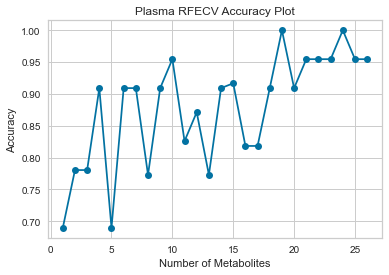

In [99]:
fig = plt.gcf()
plt.plot(plasma_accuracy["Number of Metabolites"], plasma_accuracy.Accuracy, 'o-')

plt.ylabel('Accuracy')
plt.xlabel('Number of Metabolites')
plt.title('Plasma RFECV Accuracy Plot')
plt.legend()
plt.show()
fig.savefig('Plasma RFECV Accuracy Plot.png', dpi=1000)

In [86]:
serum_accuracy = rfecv_accuracy(serum, 16, 'XGBClassifier')

  7%|▋         | 2/29 [00:00<00:01, 19.04it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 36.19it/s]


[[1, 0.7348484848484848]]


  7%|▋         | 2/29 [00:00<00:01, 16.94it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 38.91it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515]]


 10%|█         | 3/29 [00:00<00:00, 27.78it/s]

['5-hydroxynorvaline NIST', 'inosine', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 32.16it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 18.52it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 33.70it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485]]


  7%|▋         | 2/29 [00:00<00:01, 15.64it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 41.18it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726]]


  7%|▋         | 2/29 [00:00<00:01, 18.04it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 39.11it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726]]


  3%|▎         | 1/29 [00:00<00:03,  7.75it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid']


100%|██████████| 29/29 [00:01<00:00, 25.64it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.08it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 38.53it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 18.19it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine']


100%|██████████| 29/29 [00:00<00:00, 43.52it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 17.77it/s]

['uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.48it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848]]


  7%|▋         | 2/29 [00:00<00:01, 18.64it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 41.14it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 17.71it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 38.89it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 18.42it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.49it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 19.78it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 43.71it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.44it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635], [15, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 19.17it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 39.36it/s]

[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635], [15, 0.8636363636363635], [16, 0.8636363636363635]]


In [87]:
serum_accuracy = pd.DataFrame(serum_accuracy, columns= ["Number of Metabolites", "Accuracy"])

No handles with labels found to put in legend.


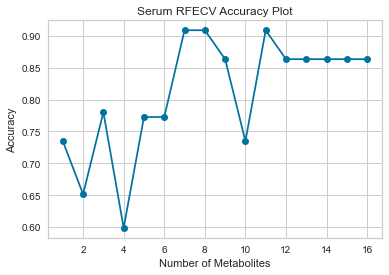

In [98]:
fig = plt.gcf()
plt.plot(serum_accuracy["Number of Metabolites"], serum_accuracy.Accuracy, 'o-')

plt.ylabel('Accuracy')
plt.xlabel('Number of Metabolites')
plt.title('Serum RFECV Accuracy Plot')
plt.legend()
plt.show()
fig.savefig('Serum RFECV Accuracy Plot.png', dpi=1000)

# Serum

In [9]:
from sklearn.model_selection import train_test_split

if serum.columns[-1]=='Class':
    X = serum.drop('Class', axis=1)
else:
    X = serum
        
y = plasma['Class'].copy()
y = y.map({"control": 0, "disease": 1})

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

scaler = RobustScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [10]:
# Init, fit, test Lasso Regressor
forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8

In [11]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,"(uric acid,)",0.02
1,"(quinic acid,)",0.03
2,"(cholesterol,)",0.03
3,"(glutamic acid,)",0.04
4,"(phenylalanine,)",0.05
5,"(threonine,)",0.05
6,"(N-methylalanine,)",0.05
7,"(3-hydroxybutanoic acid,)",0.05
8,"(malic acid,)",0.05
9,"(lactic acid,)",0.05


In [12]:
from sklearn.feature_selection import RFE

# Init the transformer

def choose(i):
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select = i)

    # Fit to the training data
    _ = rfe.fit(X_train, y_train)
    forest = RandomForestClassifier()
    _ = forest.fit(rfe.transform(X_train), y_train)
    return forest.score(rfe.transform(X_test), y_test)

In [40]:
# for i in range(1, 16+1):
#     print(choose(i))

In [14]:
from sklearn.feature_selection import RFECV

# Init, fit
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="accuracy",
    cv=10,
)

_ = rfecv.fit(X_train, y_train)

In [15]:
X_train.columns[rfecv.support_]

MultiIndex([(            'cholesterol',),
            (              'threonine',),
            ( '3-hydroxybutanoic acid',),
            ('5-hydroxynorvaline NIST',),
            (                'inosine',),
            (            'lactic acid',),
            (          'aspartic acid',),
            (          'deoxypentitol',),
            (             'malic acid',),
            (                 'phenol',),
            (                'taurine',)],
           )

In [16]:
rf = RandomForestClassifier()
_ = rf.fit(X_train, y_train)

print("Training:", rf.score(X_train, y_train))
print("Testing", rf.score(X_test, y_test))

Training: 1.0
Testing 0.84


In [39]:
imp11 = ['cholesterol',
                        'threonine',
             '3-hydroxybutanoic acid',
            '5-hydroxynorvaline NIST',
                            'inosine',
                        'lactic acid',
                      'aspartic acid',
                      'deoxypentitol',
                         'malic acid',
                             'phenol',
                            'taurine']

In [44]:
full_result = []
accuracy = []
for k in [0]:#, 2, 3, 4, 5]:
    
    if k==0:
        name = ['Serum(Raw)']
        dfs = [serum]
    
    else:
        name = [f'pca{k}_serum(Exploratory)']
        
        vars()[f'pca{k}_serum'] = pca_analysis(serum, k)
        vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)
        
        dfs = [vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(1):
            acc.append(result[i].loc['XGBClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
        full_result.append(result)

accuracy_df2 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
accuracy_df2

100%|██████████| 29/29 [00:00<00:00, 45.35it/s]


Serum(Raw): 0.8636363636363636


,Method,Accuracy
0,Serum(Raw),0.8636363636363636


In [48]:
# accuracy_df1.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/ours_plasma.csv', index=False)
# accuracy_df2.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/ours_serum.csv', index=False)

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Masrur et al.</h1>

In [23]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
serum.rename(columns = {'tocopherol alpha-': 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)
plasma0 = plasma.drop(['Unnamed: 0'], axis=1)
serum0 = serum.drop(['Unnamed: 0'], axis=1)
serum0

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,...,29820,30132,200,333019,20281,62,159853,188,1226,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25194,108,106,32,127,185,23821,53,103,1334,...,34521,35970,92,262448,18757,54,108092,180,748,control
78,23525,83,140,261,167,181,12396,65,39,1408,...,28112,28014,104,310051,26134,50,134469,211,651,control
79,25154,418,90,307,284,100,11788,124,106,997,...,39591,37287,166,295930,21733,69,82547,457,749,control
80,12397,110,104,56,342,186,15214,47,129,924,...,29273,23742,1903,276190,17275,68,112921,1256,526,control


In [24]:
# standardize
for i in ['plasma', 'serum']:
    scl = StandardScaler().fit(vars()[i+'0'].iloc[:, :-1])
    stand = scl.transform(vars()[i+'0'].iloc[:, :-1])
    vars()[i] = pd.DataFrame(stand, columns = vars()[i+'0'].columns[:-1])
    vars()[i] = pd.concat([vars()[i], vars()[i+'0'].iloc[:, -1]], axis=1)

plasma.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.32,-0.19,-0.31,0.90,0.21,-0.67,0.73,-0.14,-0.40,-0.06,...,0.52,1.94,-0.42,0.38,-1.02,-0.69,1.88,-0.53,0.63,disease
1,0.70,-0.17,1.11,-0.83,-0.53,-0.19,-0.95,-0.22,-0.17,-1.30,...,-0.90,0.31,-0.18,-0.53,-1.24,0.99,-0.34,-0.08,-0.25,disease
2,-0.81,-0.20,-0.92,-1.27,-0.88,-1.01,1.01,-0.20,-0.14,0.02,...,0.83,-0.38,-0.03,-1.03,-0.23,1.02,-0.80,-0.27,-0.88,disease
3,-0.20,-0.17,-0.24,-0.47,-0.34,-0.37,1.93,-0.16,-0.16,-1.02,...,-1.11,-0.71,-0.42,-0.48,-0.48,0.50,-0.58,-0.35,-0.62,disease
4,-0.45,-0.15,-0.26,0.94,-0.14,0.10,0.17,-0.23,-0.37,0.19,...,0.01,-0.44,0.00,0.38,0.76,-0.85,1.97,-0.44,1.90,disease


In [25]:
plasma.dtypes

1_5-anhydroglucitol                float64
1-monostearin                      float64
2_3-dihydroxybutanoic acid NIST    float64
2_4-diaminobutyric acid            float64
2-deoxyerythritol                  float64
                                    ...   
uridine                            float64
valine                             float64
xylitol                            float64
xylose                             float64
Class                               object
Length: 159, dtype: object

<a id="5"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Important Metabolites
</h1>

In [26]:
imp28 = ['3-phosphoglycerate', '5-hydroxynorvaline NIST', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'alpha-ketoglutarate', 'asparagine', 'aspartic acid', 'benzoic acid', 'citrulline', 'glutamine', 'hypoxanthine', 'inosine', 'lactamide', 'lactic acid', 'malic acid', 'maltose', 'maltotriose', 'methionine sulfoxide', 'nornicotine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'quinic acid', 'taurine', 'threonine', 'tryptophan', 'uric acid']
imp13 = ['5-hydroxynorvaline NIST', 'aspartic acid', 'cholesterol', 'deoxypentitol', 'glutamic acid', 'hypoxanthine', 'inosine', 'lactic acid', 'N-methylalanine', 'nornicotine', 'phenol', 'quinic acid', 'taurine']

<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Prediction
</h1>

In [18]:
# accuracy = []
# for k in [0, 2, 3, 4, 5]:
    
#     if k==0:
#         name = ['Plasma(Raw)']
#         dfs = [plasma[imp28]]
    
#     else:
#         name = [f'pca{k}_plasma(Exploratory)']
#         vars()[f'pca{k}_plasma'] = pca_analysis(plasma[imp28], k)
#         vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

#         dfs = [vars()[f'pca{k}_plasma_df']]

#     random_state = 42

#     for idx, data in enumerate(dfs):
#         result = []
#         if data.columns[-1]=='Class':
#             X = data.drop('Class', axis=1)
#         else:
#             X = data
#         y = plasma['Class'].copy()
#         y = y.map({"control": 0, "disease": 1})
#         rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

#         for train_index, test_index in rs.split(X):
#             clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
#             X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#             y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#             scaler = RobustScaler()

#             cols = X_train.columns
#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             X_train = pd.DataFrame(X_train, columns=[cols])
#             X_test = pd.DataFrame(X_test, columns=[cols])

#             models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#             result.append(models)
#         #     print(result)

#         acc = []
#         for i in range(1):
#             acc.append(result[i].loc['RidgeClassifier']['Balanced Accuracy'])

#         print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#         accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

# accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
# accuracy_df1

In [ ]:
# accuracy_df.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_2.csv', index=False)

In [19]:
# accuracy = []
# for k in [0, 2, 3, 4, 5]:
    
#     if k==0:
#         name = ['Serum(Raw)']
#         dfs = [serum]
    
#     else:
#         name = [f'pca{k}_serum(Exploratory)']
#         vars()[f'pca{k}_serum'] = pca_analysis(serum[imp13], k)
#         vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)
#         dfs = [vars()[f'pca{k}_serum_df']]
    
#     random_state = 42

#     for idx, data in enumerate(dfs):
#         result = []
#         if data.columns[-1]=='Class':
#             X = data.drop('Class', axis=1)
#         else:
#             X = data
#         y = plasma['Class'].copy()
#         y = y.map({"control": 0, "disease": 1})
#         rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

#         for train_index, test_index in rs.split(X):
#             clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
#             X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#             y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#             scaler = RobustScaler()

#             cols = X_train.columns
#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             X_train = pd.DataFrame(X_train, columns=[cols])
#             X_test = pd.DataFrame(X_test, columns=[cols])

#             models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#             result.append(models)
#         #     print(result)

#         acc = []
#         for i in range(1):
#             acc.append(result[i].loc['XGBClassifier']['Balanced Accuracy'])
# #                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

#         print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#         accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
# accuracy_df2 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
# accuracy_df2

In [65]:
# accuracy_df1.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/prev_plasma.csv', index=False)
# accuracy_df2.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/visualizations/curve/prev_serum.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split

if serum[imp13].columns[-1]=='Class':
    X = serum[imp13].drop('Class', axis=1)
else:
    X = serum[imp13]
        
y = plasma['Class'].copy()
y = y.map({"control": 0, "disease": 1})

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

scaler = RobustScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [33]:
# Init, fit, test Lasso Regressor
forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8

In [34]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,"(quinic acid,)",0.03
1,"(deoxypentitol,)",0.04
2,"(nornicotine,)",0.05
3,"(glutamic acid,)",0.05
4,"(cholesterol,)",0.06
5,"(taurine,)",0.06
6,"(N-methylalanine,)",0.06
7,"(5-hydroxynorvaline NIST,)",0.07
8,"(phenol,)",0.07
9,"(lactic acid,)",0.08


In [37]:
from sklearn.feature_selection import RFECV

# Init, fit
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="accuracy",
    cv=10,
)

_ = rfecv.fit(X_train, y_train)

In [38]:
X_train.columns[rfecv.support_]

MultiIndex([('5-hydroxynorvaline NIST',),
            (          'aspartic acid',),
            (           'hypoxanthine',),
            (                'inosine',),
            (            'lactic acid',)],
           )

In [39]:
rf = RandomForestClassifier()
_ = rf.fit(X_train, y_train)

print("Training:", rf.score(X_train, y_train))
print("Testing", rf.score(X_test, y_test))

Training: 1.0
Testing 0.8


<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Visualization
</h1>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


mashrur = pd.read_csv('prev_plasma.csv')
latest = pd.read_csv('ours_plasma.csv')

mashrur.head()

,Method,Accuracy
0,Plasma(Raw),0.83
1,pca2_plasma(Exploratory),0.77
2,pca3_plasma(Exploratory),0.77
3,pca4_plasma(Exploratory),0.77
4,pca5_plasma(Exploratory),0.77


In [67]:
renames = ['Before PCA', 'PCA2', 'PCA3', 'PCA4', 'PCA5']

for i in range(5):
    mashrur.loc[i, 'Method'] = renames[i]
    latest.loc[i, 'Method'] = renames[i]
mashrur.head()

,Method,Accuracy
0,Before PCA,0.83
1,PCA2,0.77
2,PCA3,0.77
3,PCA4,0.77
4,PCA5,0.77


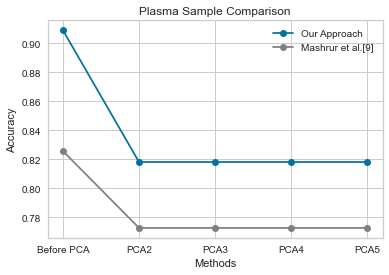

In [68]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

plt.plot(latest.Method, latest.Accuracy, 'o-', label='Our Approach')
plt.plot(mashrur.Method, mashrur.Accuracy, 'o-', label='Mashrur et al.[9]', color='gray')

plt.ylabel('Accuracy')
plt.xlabel('Methods')
plt.title('Plasma Sample Comparison')
plt.legend()
plt.show()

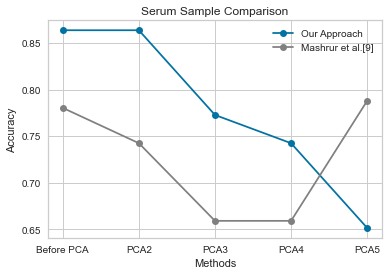

In [69]:
mashrur = pd.read_csv('prev_serum.csv')
latest = pd.read_csv('ours_serum.csv')

renames = ['Before PCA', 'PCA2', 'PCA3', 'PCA4', 'PCA5']

for i in range(5):
    mashrur.loc[i, 'Method'] = renames[i]
    latest.loc[i, 'Method'] = renames[i]

# plot both overlayed
plt.plot(latest.Method, latest.Accuracy, 'o-', label='Our Approach')
plt.plot(mashrur.Method, mashrur.Accuracy, 'o-', label='Mashrur et al.[9]', color='gray')
plt.ylabel('Accuracy')
plt.xlabel('Methods')
plt.title('Serum Sample Comparison')
plt.legend()
plt.show()